In [1]:
# Installation and importing necessary libraries
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

import fredapi as fd

In [3]:
# Initializing FRED API with API key
fred=fd.Fred(api_key='518ef89a2c354e90783a439f260ee291')

In [4]:
data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')

data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-12-12 07:42:01-06:00,93,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-12-12 07:42:02-06:00,71,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-07-12 09:01:02-05:00,42,None
CPILFESL,CPILFESL,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-12-12 07:41:02-06:00,80,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-11-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-12-12 07:41:05-06:00,52,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2023-12-30,2023-12-30,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-07-12 09:01:04-05:00,8,None
APU0000708111,APU0000708111,2023-12-30,2023-12-30,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2023-11-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-12-12 09:04:02-06:00,75,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2023-12-30,2023-12-30,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2023-11-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-12-12 09:04:03-06:00,66,Fresh regular 100% ground beef excluding round...
APU000072610,APU000072610,2023-12-30,2023-12-30,Average Price: Electricity per Kilowatt-Hour i...,1978-11-01,2023-11-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-12-12 09:05:01-06:00,64,All electricity. Average consumer prices are ...


In [5]:
data['title'][0]

'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [6]:
# Getting the CPI (Consumer Price Index) series and renaming it to 'values'
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'

cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-07-01    304.348
2023-08-01    306.269
2023-09-01    307.481
2023-10-01    307.619
2023-11-01    307.917
Name: values, Length: 923, dtype: float64

In [7]:
# Creating a DataFrame from the CPI series and resetting its index
df=pd.DataFrame(cpi).reset_index()

df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481
921,2023-10-01,307.619


In [8]:
# Selecting data starting from 1989-01-01
df2=df[df['index']>'1989-01-01']

df2

,index,values
505,1989-02-01,121.600
506,1989-03-01,122.200
507,1989-04-01,123.100
508,1989-05-01,123.700
509,1989-06-01,124.100
...,...,...
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481
921,2023-10-01,307.619


In [9]:
# Creating a line plot
fig=px.line(df2, x='index', y='values', title='CPI Avg. 1990-2023')

fig.show()

In [10]:
# Renaming DataFrame columns to 'ds' and 'y' for Prophet library usage
df2=df2.rename(columns={'index':'ds', 'values':'y'})

df2

,ds,y
505,1989-02-01,121.600
506,1989-03-01,122.200
507,1989-04-01,123.100
508,1989-05-01,123.700
509,1989-06-01,124.100
...,...,...
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481
921,2023-10-01,307.619


In [11]:
# Importing the Prophet library and creating a Prophet model
from prophet import Prophet

model=Prophet()
model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgxe3v4y/962aset4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgxe3v4y/w54k1jyp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9762', 'data', 'file=/tmp/tmpmgxe3v4y/962aset4.json', 'init=/tmp/tmpmgxe3v4y/w54k1jyp.json', 'output', 'file=/tmp/tmpmgxe3v4y/prophet_modelpem4e1q8/prophet_model-20231230102333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [24]:
# Creating a dataframe for the next 10 months with monthly frequency
future=model.make_future_dataframe(periods=10, freq='MS')

future.tail()

,ds
423,2024-05-01
424,2024-06-01
425,2024-07-01
426,2024-08-01
427,2024-09-01


In [25]:
# Making predictions using the Prophet model for the future dataframe
result=model.predict(future)

result[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1989-02-01,123.207868,118.973820,127.499617
1,1989-03-01,123.408020,119.188376,127.439715
2,1989-04-01,123.789600,119.822220,127.707801
3,1989-05-01,124.245623,119.865107,128.224816
4,1989-06-01,124.932244,120.754573,128.988240
...,...,...,...,...
423,2024-05-01,303.780861,299.793019,307.898093
424,2024-06-01,304.967517,300.890895,309.065997
425,2024-07-01,305.735030,301.474288,309.750479
426,2024-08-01,306.460479,302.288195,310.627869


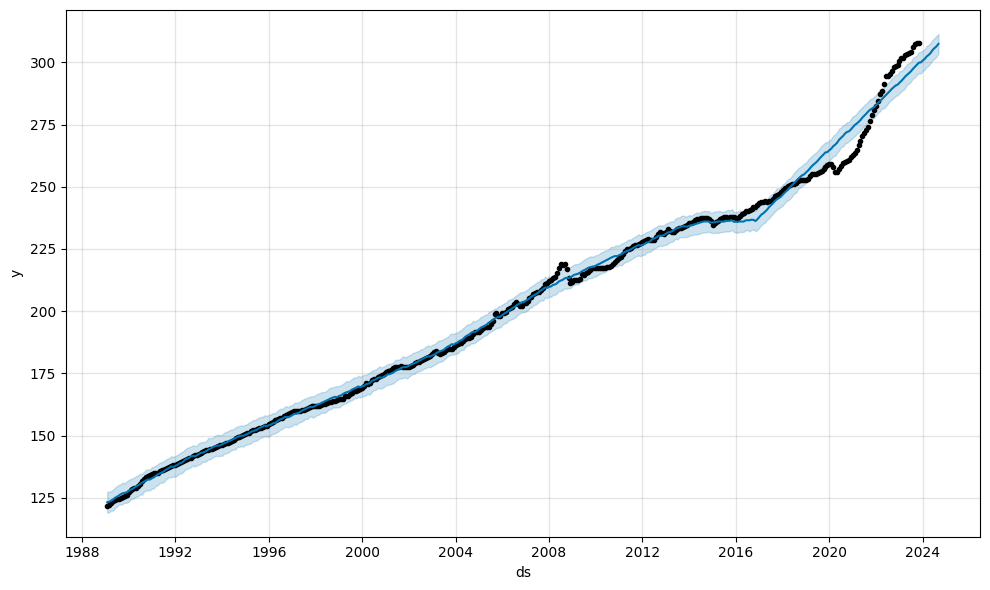

In [26]:
fig=model.plot(result)

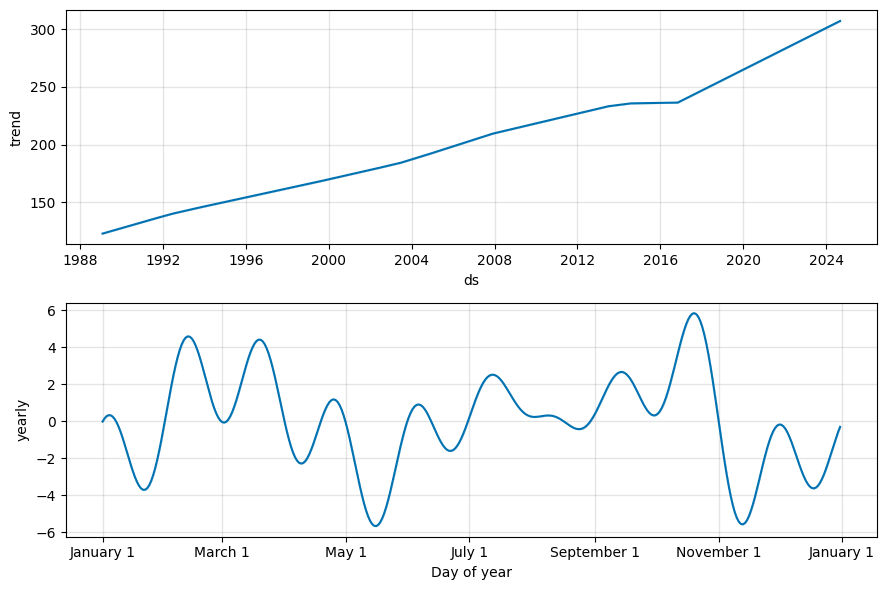

In [15]:
fig2=model.plot_components(result)

In [16]:
# Performing cross-validation to evaluate model performance
from prophet.diagnostics import cross_validation, performance_metrics

cv_results=cross_validation(model=model,
                            initial=pd.to_timedelta(30*20, unit='D'),
                            period=pd.to_timedelta(30*5, unit='D'),
                            horizon=pd.to_timedelta(30*12, unit='D')
                            )

cv_results['cutoff'] = pd.to_datetime('2023-11-01')

df_p=performance_metrics(cv_results)

INFO:prophet:Making 79 forecasts with cutoffs between 1990-10-25 00:00:00 and 2022-11-06 00:00:00


  0%|          | 0/79 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 15.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgxe3v4y/m5j2r0mr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgxe3v4y/pi0gs4pw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28438', 'data', 'file=/tmp/tmpmgxe3v4y/m5j2r0mr.json', 'init=/tmp/tmpmgxe3v4y/pi0gs4pw.json', 'output', 'file=/tmp/tmpmgxe3v4y/prophet_model99yawtck/prophet_model-20231230102335.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
10:23:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmgxe3v4y/drw_7tke.json
DEBUG:cmdstanpy:input tempfi

In [17]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,-10806 days,195.781445,13.992192,3.733285,0.027472,0.007304,0.027953,0.720430
1,-10776 days,57.830940,7.604666,2.132574,0.015525,0.006827,0.017528,0.741935
2,-10745 days,3.152442,1.775512,1.293585,0.009293,0.005491,0.009291,0.763441
3,-10715 days,2.542267,1.594449,1.193022,0.008546,0.005457,0.008560,0.784946
4,-10684 days,2.261649,1.503878,1.119629,0.007994,0.005087,0.008012,0.806452
...,...,...,...,...,...,...,...,...
351,-123 days,201.895421,14.208991,11.603898,0.039999,0.045585,0.041211,0.193548
352,-92 days,205.137358,14.322617,11.786018,0.040590,0.048640,0.041821,0.182796
353,-61 days,208.616666,14.443568,11.974850,0.041201,0.048930,0.042451,0.172043
354,-31 days,211.903796,14.556916,12.154812,0.041781,0.049487,0.043048,0.161290


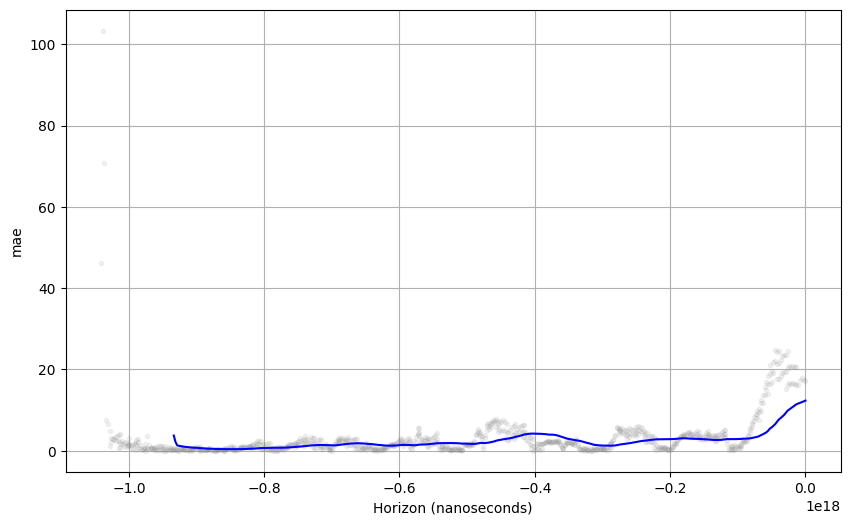

In [27]:
from prophet.plot import plot_cross_validation_metric

fig=plot_cross_validation_metric(cv_results, metric='mae')